# 2. Test Model Notebook

Con este código puede probar el resultado del modelo desplegado

## Declaraciones

In [10]:
import sagemaker
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img
from sagemaker.predictor import json_deserializer, json_serializer
from PIL import Image

## Parámetros de entrada

El único parámetro necesario es el nombre del endpoint donde está desplegado el modelo

In [11]:
endpoint = 'sagemaker-tensorflow-2020-08-26-00-36-23-892'

## Test

El resto del código lo que hace es escojer al azar un conjunto de 5 fotos del juego de validación y consultar al modelo si es un perro o un gato

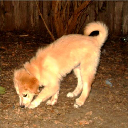

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


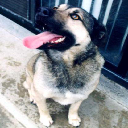

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


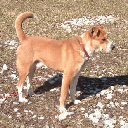

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


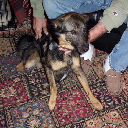

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


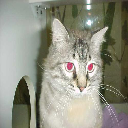

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


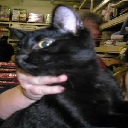

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


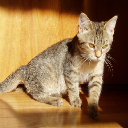

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


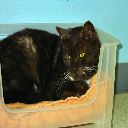

{'outputs': {'dense_1': {'dtype': 'DT_FLOAT', 'floatVal': [0.0, 0.0], 'tensorShape': {'dim': [{'size': '1'}, {'size': '2'}]}}}, 'modelSpec': {'version': '1598402706', 'name': 'generic_model', 'signatureName': 'serving_default'}}


In [12]:
predictor = sagemaker.predictor.RealTimePredictor(
    endpoint=endpoint,
    serializer=json_serializer,
    deserializer=json_deserializer,
    content_type='application/json',
    accept='application/json',)

archivos = ['4808.jpg','4809.jpg','4820.jpg','4821.jpg', '9718.jpg','9724.jpg','9726.jpg','9727.jpg']

for archivo in archivos:
        image = load_img("test_images/" + archivo, target_size=(128, 128))
        image_array = np.array(image).reshape((1, 128, 128, 3))
        image_resized = Image.fromarray(image_array[0])
        display(image_resized)
        result = predictor.predict({'inputs_input': image_array})
        print(result)

